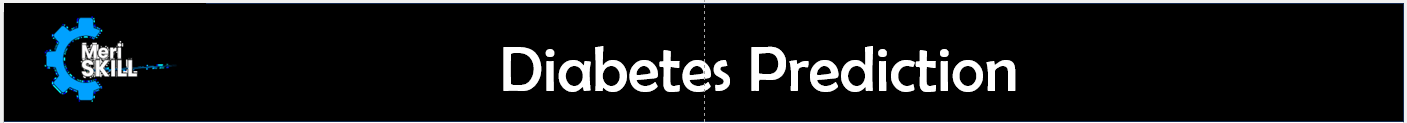

In [1]:
# installing the Pandas profiling, Lazy Predict and shap libraries
!pip install pandas-profiling
!pip install lazypredict
!pip install shap

In [2]:
# Importing the necessary libraries
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
import ydata_profiling
import lazypredict
import shap



C:\Users\Home\AppData\Local\Temp\ipykernel_16552\2772422850.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
df=pd.read_csv("C:\\Users\\Home\\Downloads\\Project 2 - Diabetes Data-20231012T000145Z-001\\Project 2 - Diabetes Data\\Project 2 MeriSKILL\\diabetes.csv")

In [4]:
#Checking the first five rows
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
#Checking the last five rows
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

### From here it is observed that the Outcome(Diabetes / no Diabetes is represented in the correct format 0 representing not diabetic and 1 representing diabetic)

In [6]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Checking for null values
df.isna().sum() * 100 / len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### Lets check the correlation of other variables with the diabetic outcome, to know which column is correlated to diabetic outcome

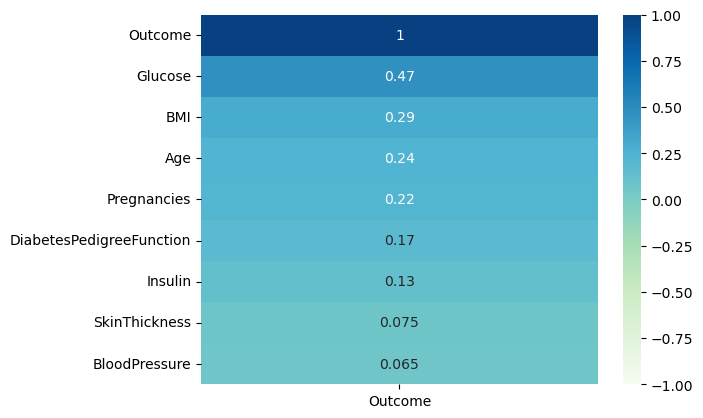

In [8]:
sns.heatmap(df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')
plt.show()

### Now we have an idea of which columns are correlated with the outcome, lets do a full profile report to gain better understanding about the dataset

In [9]:
Profile= ProfileReport(df, title = "Profile Report")
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Insights
#### Pregnancy has a high correlation with age
#### Skin Thickness is highly correlated with insulin

In [10]:
#Using Lazy Predict to determine what dataset classified the diabetics better
from lazypredict.Supervised import LazyClassifier

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#seperating dataset into dependent and independent features
X=df.drop('Outcome',axis=1)

y=df['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0 33.60   
1              1       85             66             29        0 26.60   
2              8      183             64              0        0 23.30   
3              1       89             66             23       94 28.10   
4              0      137             40             35      168 43.10   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180 32.90   
764            2      122             70             27        0 36.80   
765            5      121             72             23      112 26.20   
766            1      126             60              0        0 30.10   
767            1       93             70             31        0 30.40   

     DiabetesPedigreeFunction  Age  
0                        0.63   50  
1                        0.35   31  


In [14]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [15]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler to normalize your independent variable
scaler = MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [16]:
# splitting dataset into training and testing part(70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3)

In [17]:
print (X_scaled.shape,X_train.shape,X_test.shape)

(768, 8) (537, 8) (231, 8)


In [18]:
#creating an object of LazyClassifier class:
lazy_clf = LazyClassifier()

In [19]:
# fitting data in LazyClassifier
models,pred = lazy_clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 20.69it/s]

[LightGBM] [Info] Number of positive: 183, number of negative: 354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.340782 -> initscore=-0.659811
[LightGBM] [Info] Start training from score -0.659811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [20]:
# lets check which model did better on Lung Cancer Dataset
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.77               0.73     0.73      0.76   
RandomForestClassifier             0.77               0.72     0.72      0.76   
NuSVC                              0.77               0.72     0.72      0.76   
SVC                                0.77               0.71     0.71      0.75   
Perceptron                         0.70               0.71     0.71      0.71   
NearestCentroid                    0.71               0.71     0.71      0.72   
ExtraTreesClassifier               0.75               0.71     0.71      0.74   
XGBClassifier                      0.74               0.71     0.71      0.73   
QuadraticDiscriminantAnalysis      0.74               0.70     0.70      0.73   
LGBMClassifier                     0.73               0.70     0.70      0.73   
CalibratedClassifierCV             0.75               0.70     0.70      0.74   
LinearSVC                          0.74               0.70     0.70      0.73   
LogisticRegression                 0.74               0.70     0.70      0.73   
LinearDiscriminantAnalysis         0.74               0.70     0.70      0.73   
RidgeClassifier                    0.74               0.69     0.69      0.73   
KNeighborsClassifier               0.73               0.69     0.69      0.73   
GaussianNB                         0.73               0.69     0.69      0.72   
PassiveAggressiveClassifier        0.71               0.69     0.69      0.71   
BaggingClassifier                  0.74               0.69     0.69      0.72   
RidgeClassifierCV                  0.74               0.68     0.68      0.72   
SGDClassifier                      0.70               0.68     0.68      0.70   
DecisionTreeClassifier             0.70               0.68     0.68      0.70   
LabelSpreading                     0.70               0.67     0.67      0.69   
LabelPropagation                   0.69               0.66     0.66      0.69   
BernoulliNB                        0.68               0.64     0.64      0.67   
ExtraTreeClassifier                0.63               0.60     0.60      0.63   
DummyClassifier                    0.63               0.50     0.50      0.49   

                               Time Taken  
Model                                      
AdaBoostClassifier                   0.13  
RandomForestClassifier               0.20  
NuSVC                                0.03  
SVC                                  0.05  
Perceptron                           0.01  
NearestCentroid                      0.01  
ExtraTreesClassifier                 0.16  
XGBClassifier                        0.08  
QuadraticDiscriminantAnalysis        0.02  
LGBMClassifier                       0.30  
CalibratedClassifierCV               0.10  
LinearSVC                            0.03  
LogisticRegression                   0.01  
LinearDiscriminantAnalysis           0.01  
RidgeClassifier                      0.01  
KNeighborsClassifier                 0.03  
GaussianNB                           0.02  
PassiveAggressiveClassifier          0.01  
BaggingClassifier                    0.04  
RidgeClassifierCV                    0.01  
SGDClassifier                        0.01  
DecisionTreeClassifier               0.01  
LabelSpreading                       0.03  
LabelPropagation                     0.03  
BernoulliNB                          0.01  
ExtraTreeClassifier                  0.01  
DummyClassifier                      0.02

### From this we can observe that the Logistics Regression model outperformed other models hence we are going to use it for our prediction.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_classifier= LogisticRegression()
lr_classifier.fit(X_train, y_train)

lr_classifier_pred = lr_classifier.predict(X_test)

In [22]:
# Classification Report
print(classification_report(lr_classifier_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       176
           1       0.47      0.73      0.57        55

    accuracy                           0.74       231
   macro avg       0.68      0.74      0.69       231
weighted avg       0.80      0.74      0.76       231



In [23]:
!pip install yellowbrick

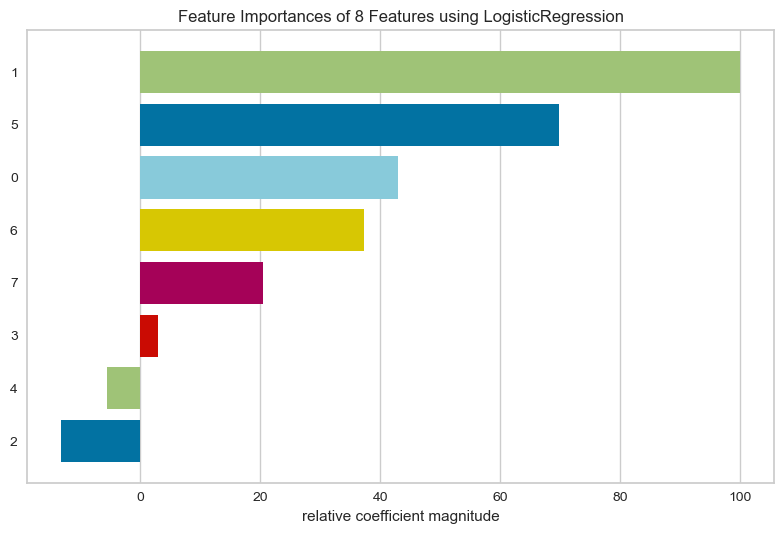

In [24]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(lr_classifier)
visualizer.fit(X_train, y_train)
visualizer.show();

- ### Feature 0 = Pregnancy
- ### Feature 1 = Glucose
- ### Feature 2 = Blood Pressure
- ### Feature 3 = Skin Thickness
- ### Feature 4 = Insulin
- ### Feature 5 = BMI
- ### Feature 6 = Diabetes Pedigree Function
- ### Feature 7 = Age

### This suggests that Glucose level, BMI (Body Mass Index), and Pregnancy are strong determining factors of predicting Diabetes, on the other hand Blood Pressure and Insulin are not important factors when predicting Diabetes

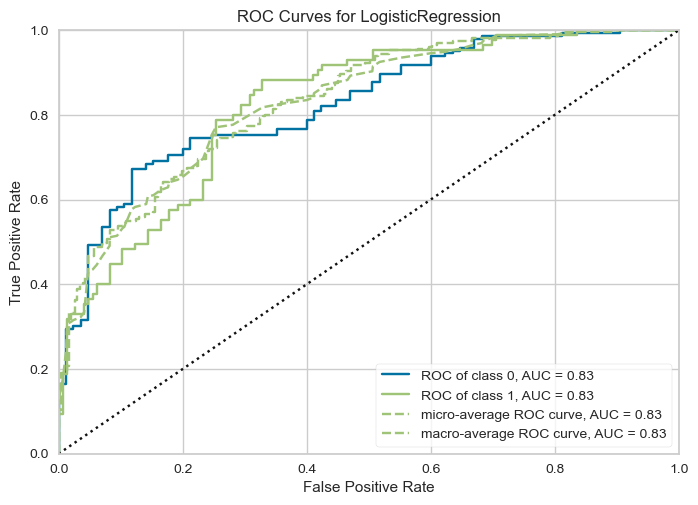

In [25]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lr_classifier)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### The ROC curve shows the performance of the classification model  and the AUC = 0.83 which showed our model performed excellently.

## Model Testing

In [40]:

#Testing Model on new data
new_data = [10,155,65,22,173,22.5,0.697,50]

new_data_numpyarray= np.asarray(new_data)
new_data_reshaped= new_data_numpyarray.reshape(1,-1)


#print(new_data_reshaped)

predict = lr_classifier.predict(new_data_reshaped)
print(predict)

if (predict[0]== 0):
    print ('The patient is not Diabetic')
else:
     print ('The patient is Diabetic')

[1]
The patient is Diabetic


## Explainability of the Model

In [28]:
shap.initjs()

In [29]:
explainer=shap.Explainer(lr_classifier.predict, X_test)
shap_values=explainer(X_test)

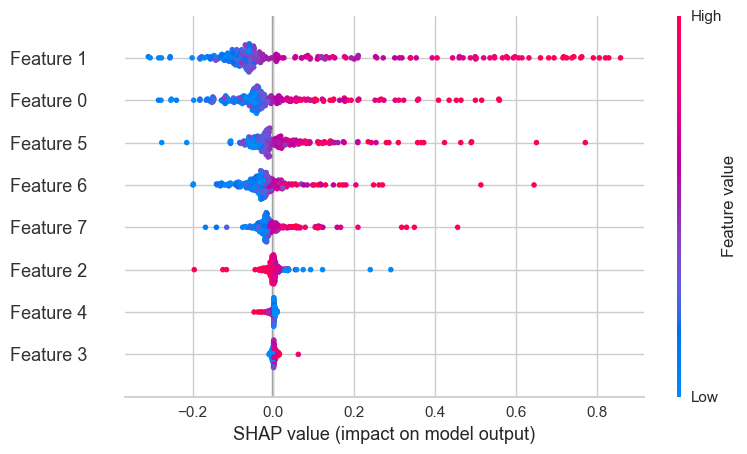

In [30]:
shap.summary_plot(shap_values)

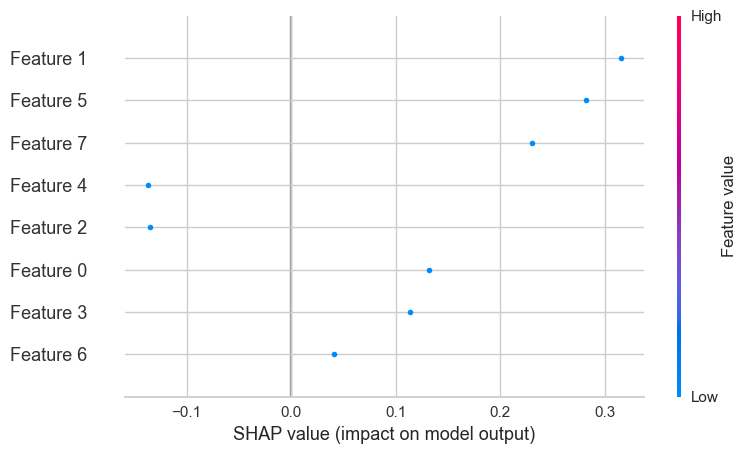

In [34]:
shap_values_newdata=explainer(new_data_reshaped)
shap.summary_plot(shap_values_newdata)

In [39]:
# Checking the shap value for the new data
shap.force_plot(shap_values_newdata)

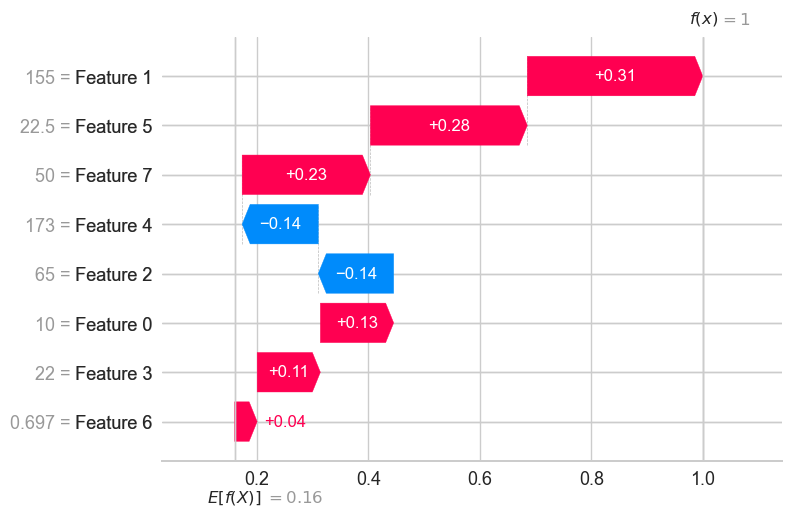

In [43]:
# checking the shap value for the first row
shap.plots.waterfall(shap_values[0])

- ### Efx- average prediction/ base value = 0.16

- ### fx - prediction made(Diabetics(0) & non-diabetics (1))

- ### Shap values are the values in between the numbers that tells us how each model feature has contributed to the difference between the prediction and the average prediction, which is the final prediction, for instance: feature 1 (Glucose) contributed to the final prediction ( Diabetic ) by 0.31

- ### The numbers on the left are the feature values.